In [15]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt


#np.set_printoptions(precision=4)
import math
from utils import *

nS = 8
nA = 2
seed = 3231
gamma = .9
river = River(nS, gamma=gamma, small=5, large=1000, seed=seed)
tau = 0.5
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)


In [16]:
r_s_a = compute_r_s_a(tmdp.P_mat_tau, tmdp.reward)
Q_star, _ = bellman_optimal_q(tmdp.P_mat_tau, tmdp.reward, gamma).values()
pi = get_policy(Q_star)
pi_prime = np.array([[0., 1.] for i in range(nS)])

V_star = get_value_function(Q_star)
print(tmdp.P_mat.shape)
print(Q_star)

Q_star_0 , _ = bellman_optimal_q(tmdp.P_mat, tmdp.reward, gamma).values()

(8, 2, 8)
[[192.32880525 189.13661796]
 [189.51630549 188.20638369]
 [188.25068062 187.66121581]
 [187.68114945 187.6218458 ]
 [187.42486044 188.95045693]
 [187.99604883 196.44325045]
 [191.36780594 236.53673494]
 [209.40987398 450.84094187]]


In [3]:
status_step = 100000

In [4]:
Q = np.zeros((nS, nA))
Qs = Q_learning(tmdp, Q, alpha=1., episodes=1000000, status_step=status_step)


In [5]:
Q_0 = np.zeros((nS, nA))
Qs_0 = Q_learning(mdp, Q_0, alpha=1., episodes=1000000, status_step=status_step)

In [6]:
print(Qs["Qs"][-1])
print(Qs["visits"])
print(len(Qs["Qs"]))


[[197.55880352 138.31611332]
 [194.65164602 142.53611528]
 [194.37206035 131.74916308]
 [139.09656319 191.68878094]
 [191.68028685 127.48051751]
 [143.02768773 204.93069804]
 [133.96404316 250.40949754]
 [171.1550656  488.19741762]]
[474918. 483386. 476122. 485898. 462054. 449082. 504622. 302370.]
11


In [17]:
tau_prime = 0.
metrics = compute_metrics(tmdp, Qs["Qs"], Q_star, tau_prime=tau_prime)
metrics_0 = compute_metrics(mdp, Qs_0["Qs"], Q_star_0, tau_prime=tau_prime)
print(metrics)
print(metrics_0)

{'J': [35.595799375000006, 246.48188362430128, 0.0, 165.20820760410382, 197.21930593693423, 51.36986301369864, 165.20820760410382, 71.08665985417582, 293.05371165085023, 165.20820760410382, 268.2465386914597, 316.06060621667064], 'J_tau': [6.381297149963374, 221.4144361832676, 0.0, 214.57926518656862, 220.92408183651878, 168.89450867052022, 214.57926518656873, 172.83795082153873, 222.66727306904846, 214.57926518656868, 227.29488162608067, 228.81854281856636], 'delta_J': [29.214502225036632, 25.067447441033664, 0.0, -49.3710575824648, -23.704775899584547, -117.52464565682158, -49.371057582464914, -101.7512909673629, 70.38643858180177, -49.37105758246486, 40.95165706537904, 87.24206339810428], 'delta_Q': [660.2508158465586, 647.3130136092849, 258.69653882667365, 357.19259447242575, 854.9978227931922, 543.780569784801, 91.52716856928504, 226.00604069495046, 188.1147836630349, 460.40882951789183, 75.6112841332723, 0.0], 'adv_terms': [5.094528266601558, -194.05156482722907, -0.0820436347430

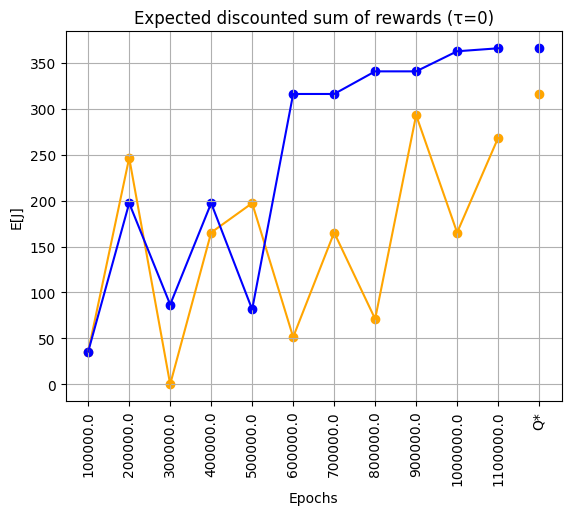

In [48]:
x = np.array([])
y_0 = np.array([])
y = np.array([])

for i, J in enumerate(metrics["J"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["J"][i])
    if i < len(metrics["J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange")
plt.plot(x[:-1], y_0[:-1], c="blue")

plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J]")
plt.title("Expected discounted sum of rewards (τ=0)")
plt.grid(visible=True)


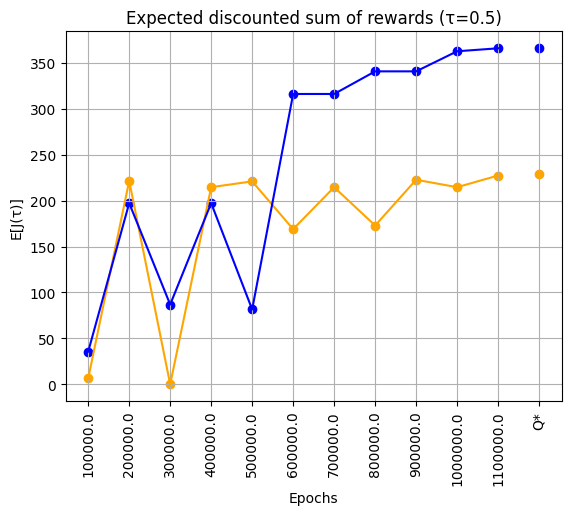

In [47]:
x = np.array([])
y = np.array([])
y_0 = np.array([])
for i, J in enumerate(metrics["J_tau"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["J_tau"][i])
    if i < len(metrics["J_tau"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange")
plt.plot(x[:-1], y_0[:-1], c="blue")

plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("E[J(τ)]")
plt.title("Expected discounted sum of rewards (τ={})".format(tmdp.tau))
plt.grid(visible=True)

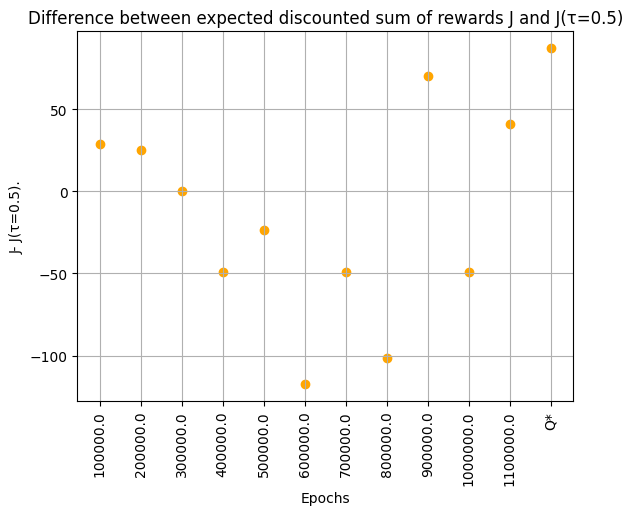

In [36]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["delta_J"]):
    y = np.append(y, J)
    if i < len(metrics["delta_J"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.xticks(x_map, x)
plt.scatter(x, y, c="orange")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("J- J(τ={}).".format(tmdp.tau))
plt.title("Difference between expected discounted sum of rewards J and J(τ={})".format(tmdp.tau))
plt.grid(visible=True)

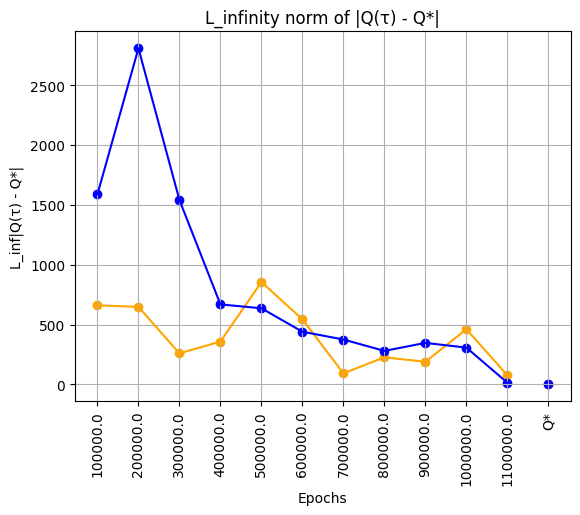

In [49]:
x = np.array([])
y = np.array([])
y_0 = np.array([])
for i, J in enumerate(metrics["delta_Q"]):
    y = np.append(y, J)
    y_0 = np.append(y_0, metrics_0["delta_Q"][i])
    if i < len(metrics["delta_Q"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.scatter(x, y_0, c="blue")

plt.plot(x[:-1], y[:-1], c="orange")
plt.plot(x[:-1], y_0[:-1], c="blue")

plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("L_inf|Q(τ) - Q*|")
plt.title("L_infinity norm of |Q(τ) - Q*|")
plt.grid(visible=True)

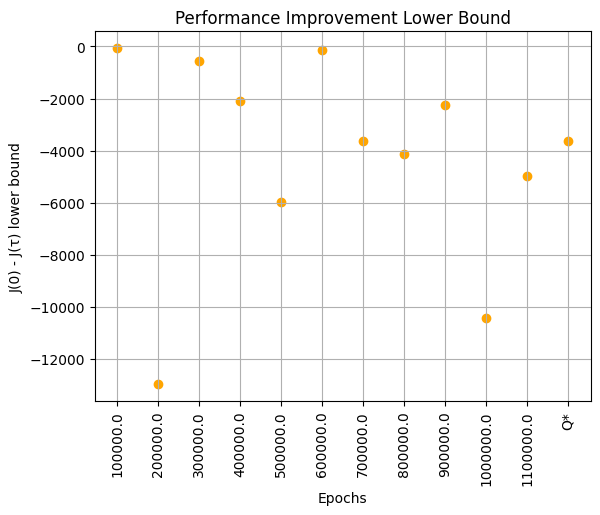

In [35]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["l_bounds"]):
    y = np.append(y, J)
    if i < len(metrics["l_bounds"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("J(0) - J(τ) lower bound")
plt.title("Performance Improvement Lower Bound")
plt.grid(visible=True)

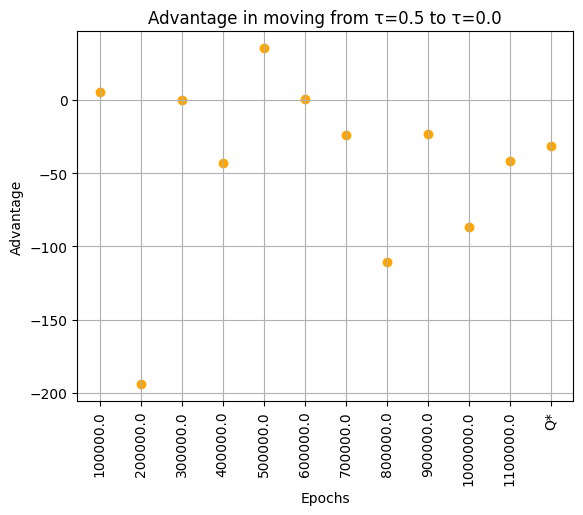

In [32]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["adv_terms"]):
    y = np.append(y, J)
    if i < len(metrics["adv_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Advantage")
plt.title("Advantage in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)

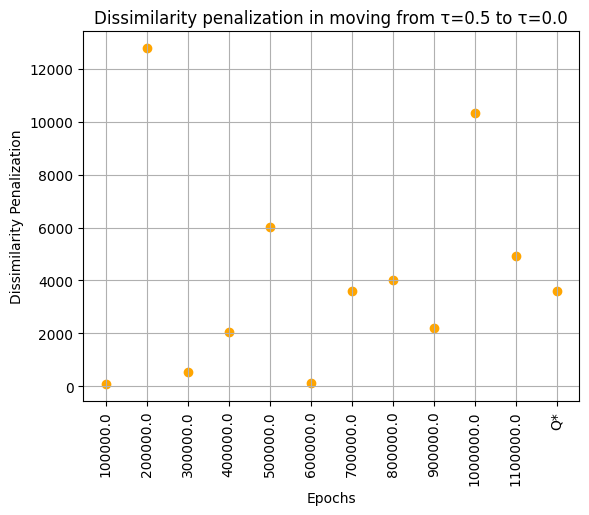

In [34]:
x = np.array([])
y = np.array([])
for i, J in enumerate(metrics["diss_terms"]):
    y = np.append(y, J)
    if i < len(metrics["diss_terms"])-1:
        x = np.append(x, (i+1)*status_step)
    else:
        x = np.append(x, "Q*")
x_map = np.array([i for i in range(len(x))])
plt.scatter(x, y, c="orange")
plt.xlabel("Epochs")
plt.xticks(rotation=90)
plt.ylabel("Dissimilarity Penalization")
plt.title("Dissimilarity penalization in moving from τ={} to τ={}".format(tmdp.tau, tau_prime))
plt.grid(visible=True)